In [20]:
# 必要なものをインポート
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [21]:
# CSVファイルを読み込む
file_path = './data/animals.csv'
dataset = pd.read_csv(file_path, index_col=0)

# データセットの確認
print(dataset)


            Height  Lifespan
Human          170        60
Chinpanzee     140        50
Duck           100        10
Eagle          120        18
Turu           130        25
Tuna           300        20
Shark          400        30


In [22]:
# データの正規化
is_scale = False  # 正規化しない：False、正規化する：True
if is_scale:
    dataset = (dataset - dataset.mean()) / dataset.std()

# 再度データセットの確認
print(dataset)

            Height  Lifespan
Human          170        60
Chinpanzee     140        50
Duck           100        10
Eagle          120        18
Turu           130        25
Tuna           300        20
Shark          400        30


In [23]:
# データ間の距離を定義する
data_dist_method = "euclidean"     # ユークリッド距離
# data_dist_method = "cityblock"     # マンハッタン距離
# data_dist_method = "chebyshev"     # 最大距離

In [24]:
# 距離行列を計算する
distance_matrix = pdist(dataset, metric=data_dist_method)

In [25]:
# クラスター間の距離の計算方法を定義する
cluster_dist_method = "single"    # 最小距離法
# cluster_dist_method = "complete"  # 最大距離法
# cluster_dist_method = "average"   # 群平均法

# 距離行列からクラスター分析を行う
cl_result = linkage(distance_matrix, method=cluster_dist_method)

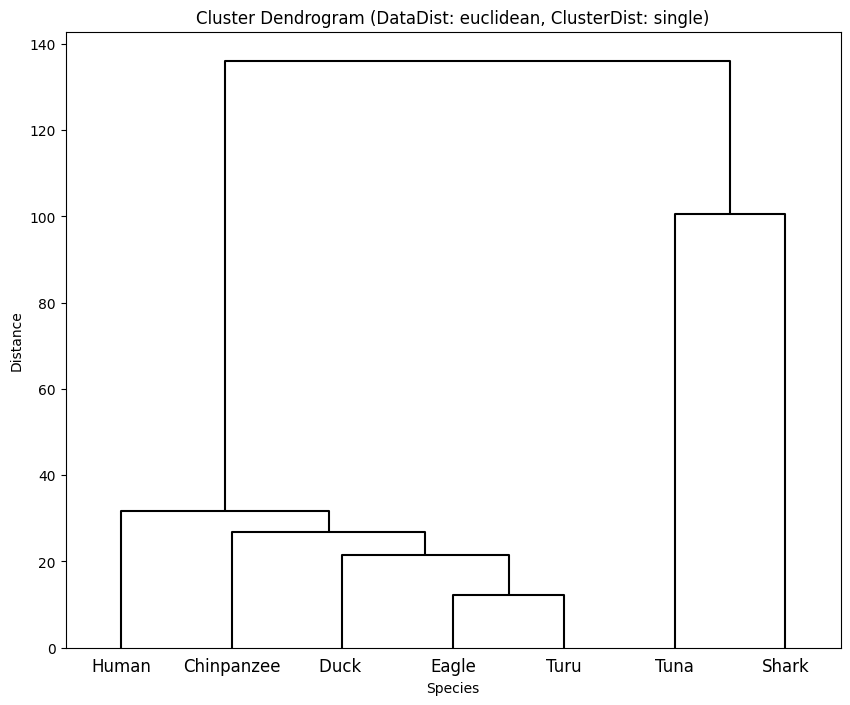

In [26]:
# クラスター分析結果の系統樹を出力する(画像形式で保存)
plt.figure(figsize=(10, 8))
dendrogram(cl_result, labels=dataset.index, orientation='top', link_color_func=lambda x: 'black')
plt.title(f'Cluster Dendrogram (DataDist: {data_dist_method}, ClusterDist: {cluster_dist_method})')
plt.xlabel('Species')
plt.ylabel('Distance')
plt.savefig(f'./result/cl_scale_{is_scale}_dtdis_{data_dist_method}_cldis_{cluster_dist_method}.png')  # 画像形式で保存
plt.show()


In [27]:
# 距離行列の保存
distance_matrix_df = pd.DataFrame(squareform(distance_matrix), index=dataset.index, columns=dataset.index)
distance_matrix_df.to_csv(f'./result/distance_matrix_scale_{is_scale}_{data_dist_method}.csv')